# 1. Formula

Description: k is the number of count events, and mu is the mean. (The distribution shape is determined by the mu.)

Probability Density Function:

$$f(k) = P(X = k) = \frac{exp^{-\mu}*\mu^k}{k!}$$

# 2. Poisson Distribution

In [1]:
from scipy.stats import poisson
import seaborn as sb

In [2]:
# Generate a random sample data with size = 1000, and mu = 2.3.
mu = 2.3
random_sample = poisson.rvs(mu, size = 1000)

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Poisson Distribution with size = 1000, mu = 2.3')]

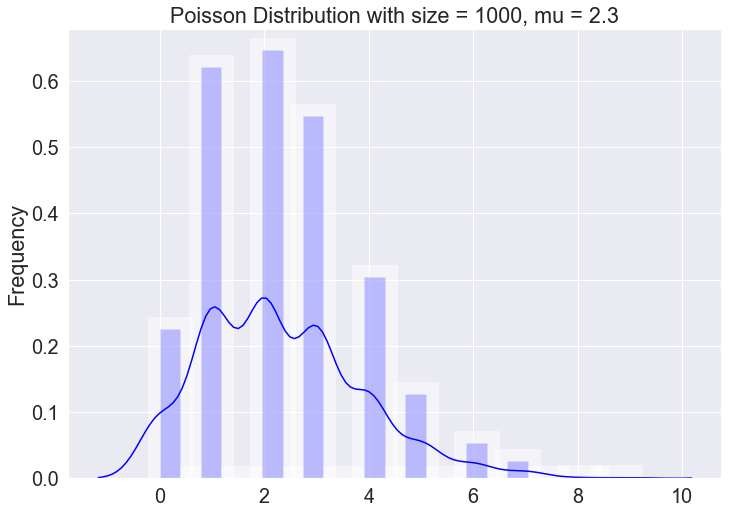

In [3]:
# Notice: For the Poisson Distribution, there is no upper bound for x-axis.
# However, larger x values tend to have lower pdf 
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(random_sample, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Poisson Distribution with size = 1000, mu = 2.3', ylabel = 'Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Poisson cumulative distribution')]

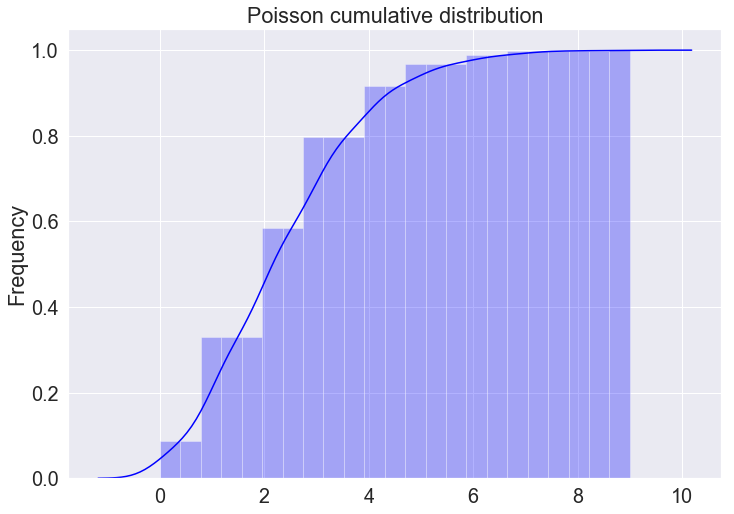

In [4]:
# CDF visualization
sb.set(rc = {'figure.figsize':(11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(random_sample, kde = True, color = 'blue',\
                 hist_kws = dict(cumulative = True, alpha = 0.3),\
                 kde_kws = dict(cumulative = True))
ax.set(title = 'Poisson cumulative distribution', ylabel = 'Frequency')

# 3. Statistics of Poisson Distribution

$$E(X) = \lambda $$

In [5]:
poisson.mean(mu = 2.3)

2.3

$$Var(X) = \lambda $$

$$Std(X) = \sqrt{Var(X)}$$

In [6]:
poisson.var(mu = 2.3)

2.3

In [7]:
round(poisson.std(mu = 2.3), 4)

1.5166

# 4. Example 
- **One nanogram of Plutonium-239 will have an average of 2.3 radioactive decays per second, and the number of decays will follow a Poisson Distribution. What is the probability that in a second period there are exactly 3 radioactive decays?**

In [8]:
# To answer this question, we can use poisson.pmf.
# Notice that the we are interesting in the time period of 2. (mu = 2.3 * 2)
print('The probability that in a second period there are exactly 3 radioactive decays is',
      round(poisson.pmf(k = 3, mu = 2.3*2), 4))

The probability that in a second period there are exactly 3 radioactive decays is 0.1631


- **What is the probability that there are no more than 3 radioactive decays? (lambda = 4.6)**

In [9]:
# To answer this question, we can use poisson.cdf.
print('The probability that there are no more than 3 radioactive decays is',
      round(poisson.cdf(k = 3, mu = 2.3*2), 4))

The probability that there are no more than 3 radioactive decays is 0.3257


In [10]:
# The answer using poisson.cdf is equivalent to summing up the pmf from k = 0 to k = 3
round(poisson.pmf(k = 0, mu = 2.3*2) + poisson.pmf(k = 1, mu = 2.3*2) + \
poisson.pmf(k = 2, mu = 2.3*2) + poisson.pmf(k = 3, mu = 2.3*2), 4)

0.3257

# 5. Relationship between Binomial Distribution and Poisson Distribution

## Requirements (Binomial Distribution is close to Poisson Distribution)
- As long as n is going to infinity. (or very large n)
- The probability of success is very close to 0. (or a very small p)
- lambda = np. (lambda stays constant)
- A rough guideline: the Poisson approximation is reasonable if n > 50 and np < 5.

## Example
- **Albinism is a rare genetic disorder that affects one in 20,000 Europeans. People with albinism produce little or none of the pigment melanin. In a random sample of 1,000 Europeans, what is the probability that exactly 2 have albinism?**

In [11]:
# Using the pmf of Binomial Distribution to solve
from scipy.stats import binom
binom.pmf(k = 2, n = 1000, p = 1/20000, loc = 0)

0.0011879650525216765

In [12]:
# Using the pmf of Poisson Distribution to solve
poisson.pmf(k = 2, mu = (1/20000)*1000)

0.001189036780625893

## Summary
- The answers using two pmfs are very similar to each other. (0.00118796 VS 0.00118903)
- We have a very large n here, which is 1000.
- The probability of success is very close to 0, which is 1/20000.

## Why use this approximation? 
- The factorials in the binomial formula can become problematic to calculate.
- A problem may be binomial, but n and p may be unknown. (We may only know the mean -> lambda)